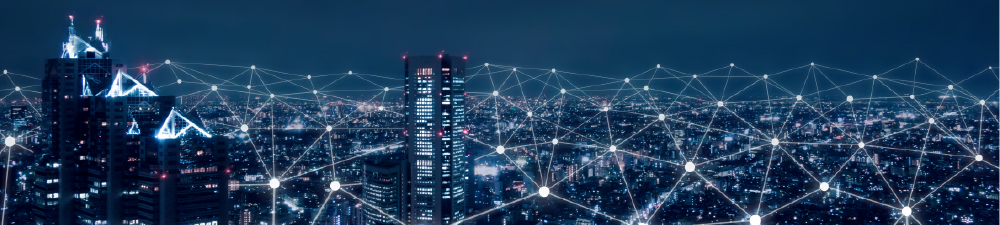

# Mini Project 3  - IU 4.6 Machine Learning

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action ='ignore', category=FutureWarning)

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action ='ignore', category=FutureWarning)

pd.set_option('display.max_columns', 100)
pd.options.display.max_rows = 1000

## Reading data and initial processing

In [2]:
#edit the file location of raw data set
non_hold_out_f_name = 'Mini_project_3_Data.xls'
hold_out_f_name = 'Mini_project_3_Hold_Out_Data.xls'

cust_df = pd.read_csv(r'{}'.format(non_hold_out_f_name))

## Exercise

## Placeholder for your analysis

In [3]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.head()
cust_df.shape
cust_df.info()

# Summary for categorical
for col in cust_df.columns:

      if cust_df[col].dtype == 'object':

            print(pd.DataFrame(cust_df[col].value_counts()))

if cust_df.CustomerID.nunique() == cust_df.CustomerID.count():

    print('No duplicate customer id found')

else:

    print('Duplicate customer id found')

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


(51047, 58)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [4]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
print('There are {} customers who generated no monthly revenue.'.format(len(cust_df[cust_df.MonthlyRevenue == 0])))
cust_df = cust_df[cust_df.MonthlyRevenue != 0]
cust_df.reset_index(drop = True, inplace = True)

There are 6 customers who generated no monthly revenue.


### Q1.2 How many columns has missing values percentage > 5%

In [5]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?
nan_counts = cust_df.isna().sum()
nan_pct = nan_counts / len(cust_df)
nan_pct = nan_pct[nan_pct != 0]
len(nan_pct)
nan_pct

14

MonthlyRevenue           0.003056
MonthlyMinutes           0.003056
TotalRecurringCharge     0.003056
DirectorAssistedCalls    0.003056
OverageMinutes           0.003056
RoamingCalls             0.003056
PercChangeMinutes        0.007151
PercChangeRevenues       0.007151
ServiceArea              0.000470
Handsets                 0.000020
HandsetModels            0.000020
CurrentEquipmentDays     0.000020
AgeHH1                   0.017809
AgeHH2                   0.017809
dtype: float64

<mark>__Result:__
    
14 columns contain missing values but none have more than 5% of their values as missing values.

Mean Imputation:
MonthlyRevenue, MonthlyMinutes, TotalRecurringCharge, DirectorAssistedCalls, OverageMinutes, RoamingCalls,
PercChangeMinutes, PercChangeRevenues

Max Count Imputation:
ServiceArea, Handsets, HandsetModels

Mean Imputation(as integer):
CurrentEquipmentDays, AgeHH1, AgeHH2

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

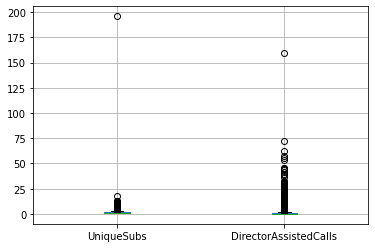

In [6]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols = ['UniqueSubs','DirectorAssistedCalls']
cust_df.boxplot(column=cols)

<AxesSubplot:>

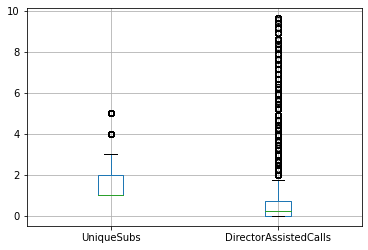

In [7]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers

def drop_outliers(df):

    return df[(df.UniqueSubs <= df.UniqueSubs.quantile(0.99)) &
              (df.DirectorAssistedCalls <= df.DirectorAssistedCalls.quantile(0.99))]

#Alternative methods to treat outliers
def treat_outliers(df, how, cutoff_val = None):

    df = df.copy()

    US_quant_val = df.UniqueSubs.quantile(0.99)
    DAC_quant_val = df.DirectorAssistedCalls.quantile(0.99)

    if(how == 'mean'):

        df[df.UniqueSubs >= US_quant_val] = df.UniqueSubs.mean().astype(int)
        df[df.DirectorAssistedCalls >= DAC_quant_val] = df.DirectorAssistedCalls.mean().round(0).astype(int)

    if(how == 'iqr'):

        df[df.UniqueSubs >= US_quant_val] = df.UniqueSubs.quantile(cutoff_val)
        df[df.DirectorAssistedCalls >= DAC_quant_val] = df.DirectorAssistedCalls.quantile(cutoff_val)

    if(how == 'clip'):

        US_mean = df.UniqueSubs.mean()
        US_stdev = df.UniqueSubs.std()
        US_stdevs = (df.UniqueSubs - US_mean) / US_stdev
        US_rep_idx = US_stdevs.index[US_stdevs > cutoff_val]

        DAC_mean = df.DirectorAssistedCalls.mean()
        DAC_stdev = df.DirectorAssistedCalls.std()
        DAC_stdevs = (df.DirectorAssistedCalls - DAC_mean) / DAC_stdev
        DAC_rep_idx = DAC_stdevs.index[DAC_stdevs > cutoff_val]

        df.UniqueSubs[US_rep_idx] = (cutoff_val * US_stdev) + US_mean
        df.DirectorAssistedCalls[DAC_rep_idx] = (cutoff_val * DAC_stdev) + DAC_mean

    return df

drop_outliers(cust_df).boxplot(column = cols)

<AxesSubplot:>

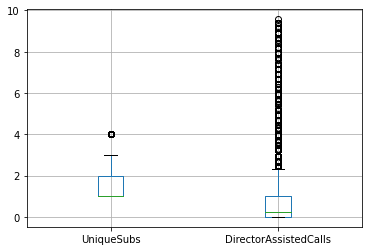

In [8]:
#Extra - With mean imputation
treat_outliers(cust_df, 'mean').boxplot(column = cols)

<AxesSubplot:>

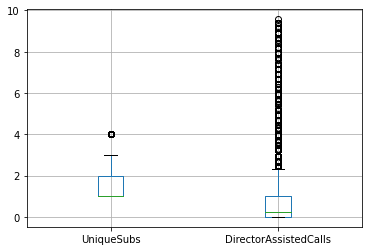

In [9]:
#Extra - With iqr
treat_outliers(cust_df, 'iqr', 0.75).boxplot(column = cols)

<AxesSubplot:>

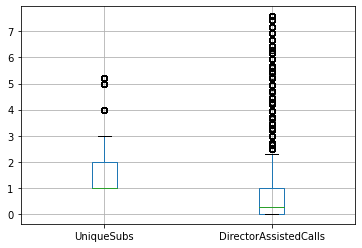

In [10]:
#Extra - With clipping to 3 standard of deviations
treat_outliers(cust_df, 'clip', 3).boxplot(column = cols)

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

<Figure size 432x432 with 0 Axes>

<AxesSubplot:ylabel='Churn'>

Text(0.5, 1.0, 'Percentage of Churn in Dataset')

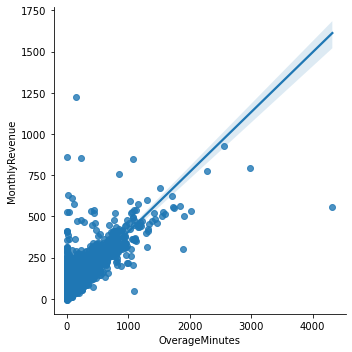

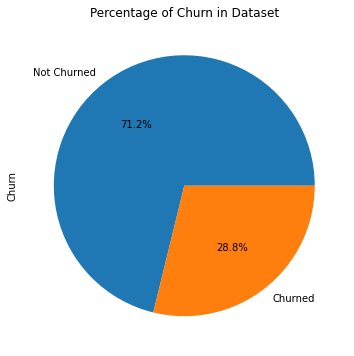

The correlation between "OverageMinutes" and "MonthlyRevenue" is 0.7878588663037679


<Figure size 432x288 with 0 Axes>

In [11]:
#use scatter plot to find the correlation between monthly revenue and overage minutes(line of best fit added)
sns.lmplot(x = 'OverageMinutes', y = 'MonthlyRevenue', data=cust_df)

plt.figure(figsize=(6,6))
cust_df.Churn.value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Not Churned', 'Churned'])
plt.title('Percentage of Churn in Dataset')
plt.show()
plt.clf()

print(f'The correlation between "OverageMinutes" and "MonthlyRevenue" is { cust_df.OverageMinutes.corr(cust_df.MonthlyRevenue) }')

<mark>__Result:__

Type your interpretation here based on the scatter plot analysis
- Yes there is a high degree of positive correlation between monthly revenue and overage minutes.

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

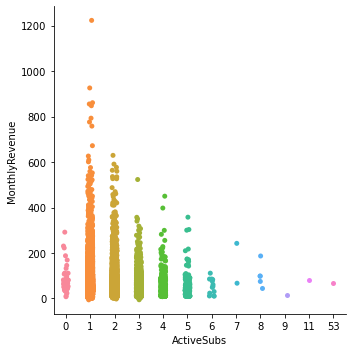

In [12]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x = 'ActiveSubs', y = 'MonthlyRevenue', data = cust_df)

<mark>__Result:__

Type your interpretation here based on the category plot analysis
- Yes. Generally, the monthly revenue generated by customers tends to decrese when they have a high number of active subscriptions.

### Q2.3 Does credit rating have an impact in churn rate?

<Figure size 1440x576 with 0 Axes>

<BarContainer object of 8 artists>

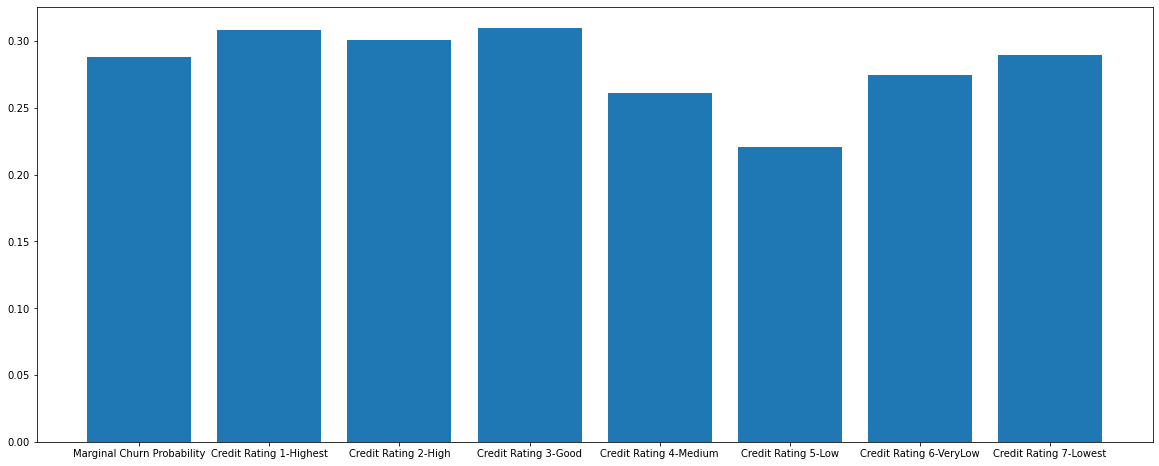

<Figure size 432x288 with 0 Axes>

In [13]:
marg_churn_prob = len(cust_df.Churn[cust_df.Churn == "Yes"]) / len(cust_df.Churn)

def CR_churn_probs(df, credit_rating):

    df = df[['Churn', 'CreditRating']]
    df = df[df.CreditRating.str.contains(str(credit_rating))]

    return len(df.Churn[df.Churn == "Yes"]) / len(df.Churn)

churn_probs = [marg_churn_prob if cred_rating == 0 else CR_churn_probs(cust_df, cred_rating) for cred_rating in range(8)]

labels = 'Credit Rating ' + cust_df.CreditRating.unique()
labels = np.insert(np.sort(labels), 0, 'Marginal Churn Probability')
plt.figure(figsize = (20, 8))
plt.bar(labels, churn_probs);
plt.show()
plt.clf()

<mark>__Result:__

As the churn probabilities conditional on each credit score category except the 'Credit Rating 7-Lowest' are different from the marginal churn probability, credit rating has an impact on churn rates.

### Placeholder for additional exploratory analysis

In [14]:
cust_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51036,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,2.0,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51037,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,LAXCDG310,2.0,2.0,464.0,48.0,48.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,9,No,1,60,No,3-Good,Other,Other,No
51038,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,LAXCDG310,3.0,2.0,378.0,36.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80,No,5-Low,Other,Clerical,No
51039,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,NEVPOW619,2.0,2.0,433.0,32.0,0.0,Yes,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,9,No,0,30,No,5-Low,Other,Other,No


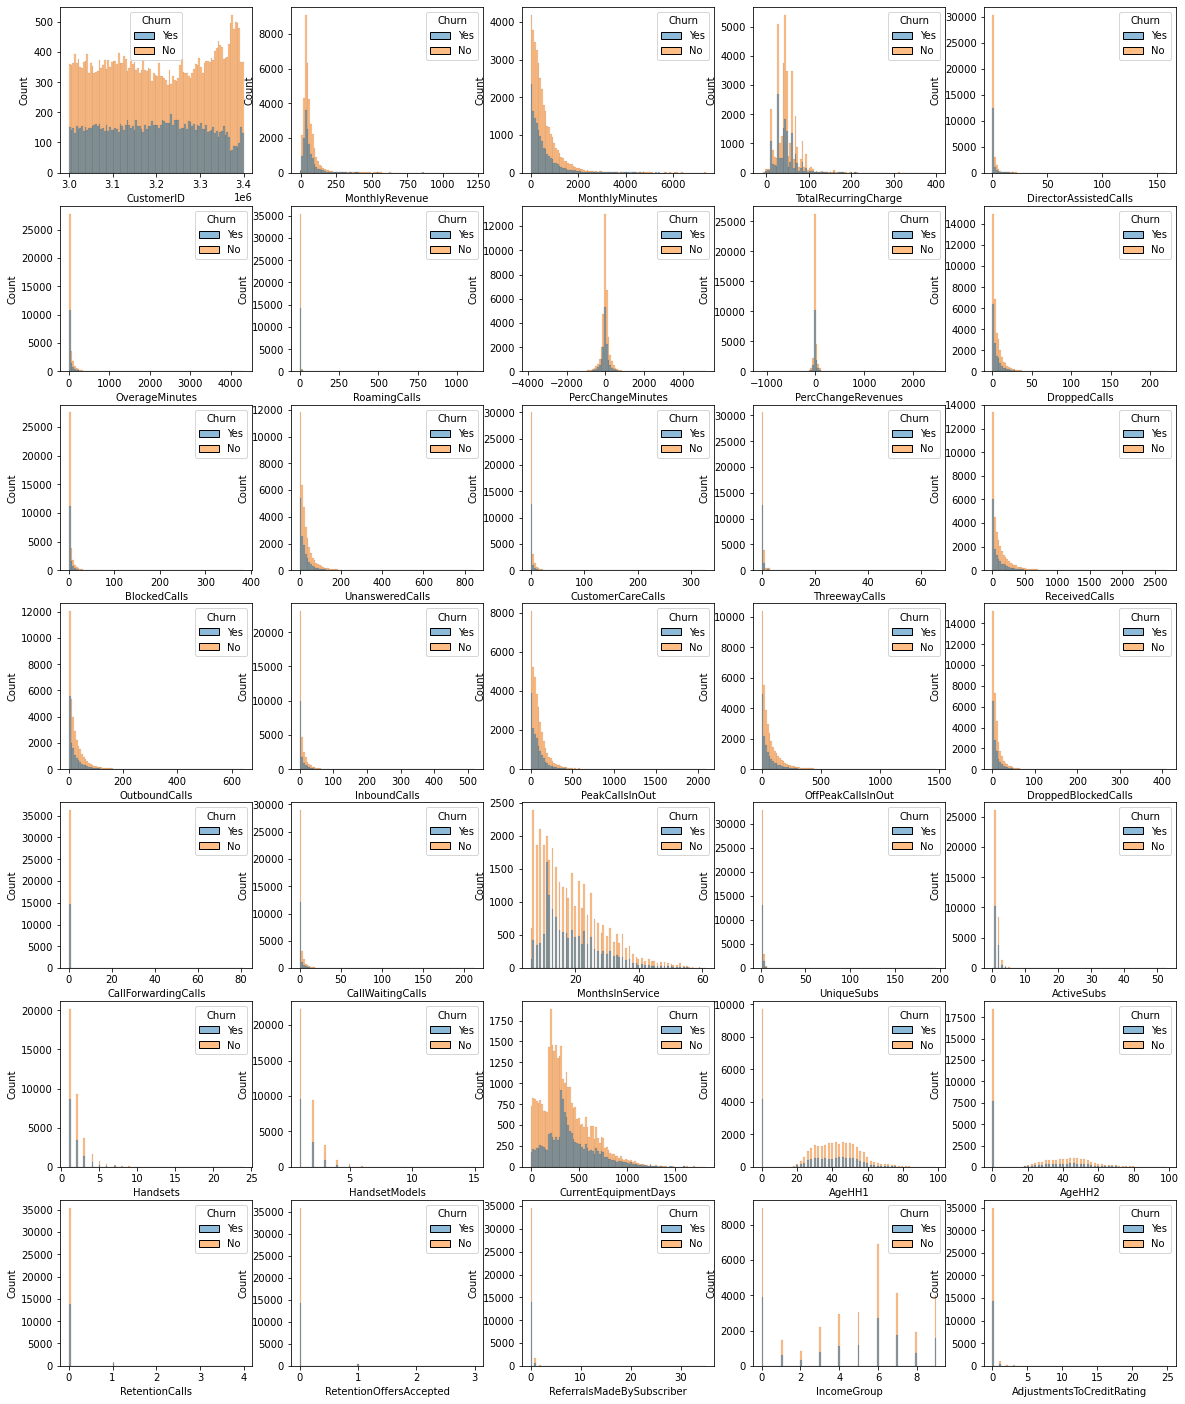

In [15]:
plots_per_row = 5

n_plots = cust_df.select_dtypes(exclude = ['object']).shape[-1]

fig, axes = plt.subplots((n_plots // plots_per_row) + ((n_plots % 5) != 0), plots_per_row) 

axes = axes.flatten()

for idx, (_, col) in enumerate(cust_df.select_dtypes(exclude=['object']).columns.to_series().items()):

    a = sns.histplot(data = cust_df, x = cust_df[col], hue = 'Churn', ax = axes[idx], kde = False, bins = 100)

for i in range(1, len(axes) - n_plots + 1):

    fig.delaxes(axes[-i]) #Remove empty subplots

fig.set_figwidth(20)
fig.set_figheight(25)

plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder

#Sort column types
YN_cols = ['Churn', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'BuysViaMailOrder',
           'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
           'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'MaritalStatus']
known_unknown_cols = ['Homeownership']
spec_cols = ['ServiceArea', 'CreditRating', 'PrizmCode', 'Occupation']

#Encode variables

def enc_cols(df):

    df = df.copy()

    YN_cols = ['Churn', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'BuysViaMailOrder',
           'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
           'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'MaritalStatus']
    known_unknown_cols = ['Homeownership']
    spec_cols = ['ServiceArea', 'CreditRating', 'PrizmCode', 'Occupation']

    label_enc = LabelEncoder()
    inspection_cols = []

    for col in df.columns:

        if(col in YN_cols):

            rep_dict = {'No': 0, 'Yes': 1}
            df[col].replace(rep_dict, regex = True, inplace = True)

        if(col in known_unknown_cols):

            rep_dict = {'Unknown': 0, 'Known': 1}
            df[col].replace(rep_dict, regex = True, inplace = True)

        if(col in spec_cols):

            if(col == 'ServiceArea'):

                df[col] = label_enc.fit_transform(df[col])

                continue

            if(col == 'CreditRating'):

                rep_dict = {'1-Highest': 6, '2-High': 5, '3-Good': 4, '4-Medium': 3, '5-Low': 2, '6-VeryLow': 1, '7-Lowest': 0}

            if(col == 'PrizmCode'):

                rep_dict = {'Rural': 0, 'Town': 1, 'Suburban': 2, 'Other': 3}

            if(col == 'Occupation'):

                rep_dict = {'Student': 0, 'Homemaker': 1, 'Retired': 2, 'Clerical': 3, 'Crafts': 4, 'Professional': 5,
                            'Self': 6, 'Other': 7}

            df[col].replace(rep_dict, regex = True, inplace = True)

        col_U_vals = df[col].unique()

        if('Unknown' in col_U_vals):

            inspection_cols.append(col)

    return df, inspection_cols

cust_df, inspection_cols = enc_cols(cust_df)
cust_df
inspection_cols

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,658,2.0,2.0,361.0,62.0,0.0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,4,0,0,30,1,6,2,5,0
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,610,2.0,1.0,1504.0,40.0,42.0,1,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0,5,0,0,30,0,3,2,5,1
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,352,1.0,1.0,1812.0,26.0,26.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,6,0,0,Unknown,0,4,1,4,1
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,610,9.0,4.0,458.0,30.0,0.0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,6,0,0,10,0,3,3,7,0
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,563,4.0,3.0,852.0,46.0,54.0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,9,0,1,10,0,6,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51036,3399958,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,310,2.0,2.0,526.0,68.0,64.0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,6,0,0,60,0,6,2,7,1
51037,3399974,0,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,288,2.0,2.0,464.0,48.0,48.0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,0,9,0,1,60,0,4,3,7,0
51038,3399978,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,288,3.0,2.0,378.0,36.0,0.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,7,0,1,80,0,2,3,3,0
51039,3399990,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,411,2.0,2.0,433.0,32.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,30,0,2,3,7,0


['HandsetPrice', 'MaritalStatus']

## Q3. Create additional features to help predict churn

In [17]:
#wrapper function to process data for churn prediction
def process_data(df, insp_cols):

    df = df.copy()

    #Drop the 'CustomerID' column
    df.drop('CustomerID', axis = 1, inplace = True)

    #3.1 Percent of current active subs over total subs
    df['perc_active_subs'] = (df['ActiveSubs'] / df['UniqueSubs']).round(2)

    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    df['perc_recurrent_charge'] = (df['TotalRecurringCharge'] / df['MonthlyRevenue']).round(2)

    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    df['perc_overage_mins'] = (df['OverageMinutes'] / df['MonthlyMinutes']).round(2)

    #Create percentage based features
    spec_mins_cols = ['RoamingCalls', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
                      'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut']

    for col in spec_mins_cols:

        df['perc_{}'.format(col)] = (df[col] / df['MonthlyMinutes']).round(2)

    #Create missing value features and fill missing values as defined in Q1.2
    for col in df.columns:

        if(len(df[col][df[col] == np.inf]) != 0):

            df[col] = df[col].replace(np.inf, np.nan)

        if(df[col].isnull().values.any()):

            df['is_unknown_{}'.format(col)] = np.where(df[col].isnull(), 1, 0)

            if(col in ['ServiceArea', 'Handsets', 'HandsetModels']):

                df[col].fillna(df[col].mode().iloc[-1], inplace = True)

            elif(col in ['CurrentEquipmentDays', 'AgeHH1', 'AgeHH2']):

                df[col].fillna(df[col].mean().round(0), inplace = True)

            else:

                df[col].fillna(df[col].mean().round(2), inplace = True)

    #Fill ambiguous values with max count
    for col in insp_cols:

        val_counts = df[col].value_counts()
        val_counts = val_counts[(val_counts.index != 'Unknown')]

        df[col][df[col] == 'Unknown'] = val_counts.index[(val_counts == val_counts.max())][0]

    #Sorting columns by ideal data type
    hour_conv_cols = ['MonthlyMinutes', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'DroppedCalls',
                      'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls',
                      'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
                      'CallForwardingCalls', 'CallWaitingCalls']
    basis_point_cols = ['PercChangeMinutes', 'PercChangeRevenues']
    year_cols = ['MonthsInService', 'CurrentEquipmentDays']

    #Applying tranformations
    for col in df.columns:

        if(col in hour_conv_cols):

            df[col] = (df[col] / 60).round(2)

        if(col in basis_point_cols):

            df[col] = (df[col] / 100).round(2)

        if(col in year_cols):

            if(col == 'MonthsInService'):

                df[col] = (df[col] / 12).round(2)

            if(col == 'CurrentEquipmentDays'):

                df[col] = (df[col] / 365.24).round(2)

    #Correcting column data types
    float_cols = []
    int_cols = []

    for col in df.columns:

        split_cols = df[col].astype(str).str.split('.', expand = True)

        if(split_cols.shape[-1] == 2):

            split_cols = split_cols.iloc[:, -1]
            split_cols = split_cols[split_cols != '0']

            if(len(split_cols) > 0):

                df[col] = df[col].astype(float)
                float_cols.append(col)

            else:

                df[col] = df[col].astype(int)
                int_cols.append(col)

        else:

            df[col] = df[col].astype(int)
            int_cols.append(col)

    return df, float_cols, int_cols

In [18]:
#Check column data types
{col: cust_df[col].dtype for col in cust_df.columns}

{'CustomerID': dtype('int64'),
 'Churn': dtype('int64'),
 'MonthlyRevenue': dtype('float64'),
 'MonthlyMinutes': dtype('float64'),
 'TotalRecurringCharge': dtype('float64'),
 'DirectorAssistedCalls': dtype('float64'),
 'OverageMinutes': dtype('float64'),
 'RoamingCalls': dtype('float64'),
 'PercChangeMinutes': dtype('float64'),
 'PercChangeRevenues': dtype('float64'),
 'DroppedCalls': dtype('float64'),
 'BlockedCalls': dtype('float64'),
 'UnansweredCalls': dtype('float64'),
 'CustomerCareCalls': dtype('float64'),
 'ThreewayCalls': dtype('float64'),
 'ReceivedCalls': dtype('float64'),
 'OutboundCalls': dtype('float64'),
 'InboundCalls': dtype('float64'),
 'PeakCallsInOut': dtype('float64'),
 'OffPeakCallsInOut': dtype('float64'),
 'DroppedBlockedCalls': dtype('float64'),
 'CallForwardingCalls': dtype('float64'),
 'CallWaitingCalls': dtype('float64'),
 'MonthsInService': dtype('int64'),
 'UniqueSubs': dtype('int64'),
 'ActiveSubs': dtype('int64'),
 'ServiceArea': dtype('int32'),
 'Handse

In [19]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df_proc, is_float_cols, is_int_cols = process_data(cust_df, inspection_cols)

In [20]:
cust_df_proc

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_mins,perc_RoamingCalls,perc_DroppedCalls,perc_BlockedCalls,perc_UnansweredCalls,perc_CustomerCareCalls,perc_ThreewayCalls,perc_OutboundCalls,perc_InboundCalls,perc_PeakCallsInOut,perc_OffPeakCallsInOut,is_unknown_MonthlyRevenue,is_unknown_MonthlyMinutes,is_unknown_TotalRecurringCharge,is_unknown_DirectorAssistedCalls,is_unknown_OverageMinutes,is_unknown_RoamingCalls,is_unknown_PercChangeMinutes,is_unknown_PercChangeRevenues,is_unknown_Handsets,is_unknown_HandsetModels,is_unknown_CurrentEquipmentDays,is_unknown_AgeHH1,is_unknown_AgeHH2,is_unknown_perc_recurrent_charge,is_unknown_perc_overage_mins,is_unknown_perc_RoamingCalls,is_unknown_perc_DroppedCalls,is_unknown_perc_BlockedCalls,is_unknown_perc_UnansweredCalls,is_unknown_perc_CustomerCareCalls,is_unknown_perc_ThreewayCalls,is_unknown_perc_OutboundCalls,is_unknown_perc_InboundCalls,is_unknown_perc_PeakCallsInOut,is_unknown_perc_OffPeakCallsInOut
0,1,24.00,3.65,22.00,0.00,0.00,0.00,-1.57,-0.19,0.01,0.01,0.10,0.00,0.00,1.62,0.00,0.00,0.97,0.40,0.02,0.0,0.00,5.08,2,1,658,2,2,0.99,62,0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,4,0,0,30,1,6,2,5,0,0.5,0.92,0.00,0.0,0.00,0.00,0.03,0.0,0.0,0.00,0.00,0.26,0.11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,16.99,0.17,17.00,0.00,0.00,0.00,-0.04,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.08,0.02,0.00,0.0,0.00,4.83,1,1,610,2,1,4.12,40,42,1,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0,5,0,0,30,0,3,2,5,1,1.0,1.00,0.00,0.0,0.03,0.00,0.27,0.0,0.0,0.00,0.00,0.50,0.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,38.00,0.13,38.00,0.00,0.00,0.00,-0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.02,0.06,0.00,0.0,0.00,5.00,1,1,352,1,1,4.96,26,26,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,6,0,0,30,0,4,1,4,1,1.0,1.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.04,0.00,0.16,0.46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,82.28,21.87,75.00,0.02,0.00,0.00,1.57,0.08,0.87,0.13,1.27,0.07,0.02,3.34,6.17,2.45,9.26,5.06,1.00,0.0,0.38,4.92,2,2,610,9,4,1.25,30,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,6,0,0,10,0,3,3,7,0,1.0,0.91,0.00,0.0,0.04,0.01,0.06,0.0,0.0,0.28,0.11,0.42,0.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,17.14,0.00,17.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,4.42,2,2,563,4,3,2.33,46,54,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,9,0,1,10,0,6,3,5,1,1.0,0.99,0.06,0.0,0.01,0.01,0.06,0.0,0.0,0.05,0.01,0.20,0.13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51036,1,58.84,8.76,46.84,0.02,0.67,0.02,-0.12,-0.01,0.16,0.05,0.80,0.00,0.00,0.98,0.28,0.02,2.67,0.55,0.20,0.0,0.00,2.42,1,1,310,2,2,1.44,68,64,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,6,0,0,60,0,6,2,7,1,1.0,0.90,0.06,0.0,0.01,0.01,0.06,0.0,0.0,0.05,0.01,0.20,0.13,1,1,1,1,1

In [21]:
#Check if there are any new NaN values
print(cust_df_proc.isna().sum())
cust_df_proc.shape

Churn                                0
MonthlyRevenue                       0
MonthlyMinutes                       0
TotalRecurringCharge                 0
DirectorAssistedCalls                0
OverageMinutes                       0
RoamingCalls                         0
PercChangeMinutes                    0
PercChangeRevenues                   0
DroppedCalls                         0
BlockedCalls                         0
UnansweredCalls                      0
CustomerCareCalls                    0
ThreewayCalls                        0
ReceivedCalls                        0
OutboundCalls                        0
InboundCalls                         0
PeakCallsInOut                       0
OffPeakCallsInOut                    0
DroppedBlockedCalls                  0
CallForwardingCalls                  0
CallWaitingCalls                     0
MonthsInService                      0
UniqueSubs                           0
ActiveSubs                           0
ServiceArea              

(51041, 95)

In [22]:
#Check if column data types have been corrected
{col: cust_df_proc[col].dtype for col in cust_df_proc.columns}

{'Churn': dtype('int32'),
 'MonthlyRevenue': dtype('float64'),
 'MonthlyMinutes': dtype('float64'),
 'TotalRecurringCharge': dtype('float64'),
 'DirectorAssistedCalls': dtype('float64'),
 'OverageMinutes': dtype('float64'),
 'RoamingCalls': dtype('float64'),
 'PercChangeMinutes': dtype('float64'),
 'PercChangeRevenues': dtype('float64'),
 'DroppedCalls': dtype('float64'),
 'BlockedCalls': dtype('float64'),
 'UnansweredCalls': dtype('float64'),
 'CustomerCareCalls': dtype('float64'),
 'ThreewayCalls': dtype('float64'),
 'ReceivedCalls': dtype('float64'),
 'OutboundCalls': dtype('float64'),
 'InboundCalls': dtype('float64'),
 'PeakCallsInOut': dtype('float64'),
 'OffPeakCallsInOut': dtype('float64'),
 'DroppedBlockedCalls': dtype('float64'),
 'CallForwardingCalls': dtype('float64'),
 'CallWaitingCalls': dtype('float64'),
 'MonthsInService': dtype('float64'),
 'UniqueSubs': dtype('int32'),
 'ActiveSubs': dtype('int32'),
 'ServiceArea': dtype('int32'),
 'Handsets': dtype('int32'),
 'Handse

## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [23]:
cust_df_proc

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_mins,perc_RoamingCalls,perc_DroppedCalls,perc_BlockedCalls,perc_UnansweredCalls,perc_CustomerCareCalls,perc_ThreewayCalls,perc_OutboundCalls,perc_InboundCalls,perc_PeakCallsInOut,perc_OffPeakCallsInOut,is_unknown_MonthlyRevenue,is_unknown_MonthlyMinutes,is_unknown_TotalRecurringCharge,is_unknown_DirectorAssistedCalls,is_unknown_OverageMinutes,is_unknown_RoamingCalls,is_unknown_PercChangeMinutes,is_unknown_PercChangeRevenues,is_unknown_Handsets,is_unknown_HandsetModels,is_unknown_CurrentEquipmentDays,is_unknown_AgeHH1,is_unknown_AgeHH2,is_unknown_perc_recurrent_charge,is_unknown_perc_overage_mins,is_unknown_perc_RoamingCalls,is_unknown_perc_DroppedCalls,is_unknown_perc_BlockedCalls,is_unknown_perc_UnansweredCalls,is_unknown_perc_CustomerCareCalls,is_unknown_perc_ThreewayCalls,is_unknown_perc_OutboundCalls,is_unknown_perc_InboundCalls,is_unknown_perc_PeakCallsInOut,is_unknown_perc_OffPeakCallsInOut
0,1,24.00,3.65,22.00,0.00,0.00,0.00,-1.57,-0.19,0.01,0.01,0.10,0.00,0.00,1.62,0.00,0.00,0.97,0.40,0.02,0.0,0.00,5.08,2,1,658,2,2,0.99,62,0,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0,0,0,4,0,0,30,1,6,2,5,0,0.5,0.92,0.00,0.0,0.00,0.00,0.03,0.0,0.0,0.00,0.00,0.26,0.11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,16.99,0.17,17.00,0.00,0.00,0.00,-0.04,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.08,0.02,0.00,0.0,0.00,4.83,1,1,610,2,1,4.12,40,42,1,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0,5,0,0,30,0,3,2,5,1,1.0,1.00,0.00,0.0,0.03,0.00,0.27,0.0,0.0,0.00,0.00,0.50,0.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,38.00,0.13,38.00,0.00,0.00,0.00,-0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.02,0.06,0.00,0.0,0.00,5.00,1,1,352,1,1,4.96,26,26,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,6,0,0,30,0,4,1,4,1,1.0,1.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.04,0.00,0.16,0.46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,82.28,21.87,75.00,0.02,0.00,0.00,1.57,0.08,0.87,0.13,1.27,0.07,0.02,3.34,6.17,2.45,9.26,5.06,1.00,0.0,0.38,4.92,2,2,610,9,4,1.25,30,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,6,0,0,10,0,3,3,7,0,1.0,0.91,0.00,0.0,0.04,0.01,0.06,0.0,0.0,0.28,0.11,0.42,0.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,17.14,0.00,17.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,4.42,2,2,563,4,3,2.33,46,54,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,1,0,9,0,1,10,0,6,3,5,1,1.0,0.99,0.06,0.0,0.01,0.01,0.06,0.0,0.0,0.05,0.01,0.20,0.13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51036,1,58.84,8.76,46.84,0.02,0.67,0.02,-0.12,-0.01,0.16,0.05,0.80,0.00,0.00,0.98,0.28,0.02,2.67,0.55,0.20,0.0,0.00,2.42,1,1,310,2,2,1.44,68,64,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,6,0,0,60,0,6,2,7,1,1.0,0.90,0.06,0.0,0.01,0.01,0.06,0.0,0.0,0.05,0.01,0.20,0.13,1,1,1,1,1

In [24]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in x and y
x = cust_df_proc.iloc[ : , 1:]
y = cust_df_proc.Churn

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = False)

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

#Function to scale data
def transform_n_balance_data(indep_train, indep_test, dep_train):#, float_cols):

    to_scale_cols = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
                     'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls',
                     'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
                     'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls',
                     'MonthsInService', 'CurrentEquipmentDays', 'perc_active_subs', 'perc_recurrent_charge',
                     'perc_overage_mins', 'perc_RoamingCalls', 'perc_DroppedCalls', 'perc_BlockedCalls', 'perc_UnansweredCalls',
                     'perc_CustomerCareCalls', 'perc_ThreewayCalls', 'perc_OutboundCalls']

    no_scale_cols = ['UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
                     'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder',
                     'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
                     'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser', 'ReferralsMadeBySubscriber',
                     'IncomeGroup', 'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice', 'MadeCallToRetentionTeam',
                     'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus', 'perc_InboundCalls', 'perc_PeakCallsInOut',
                     'perc_OffPeakCallsInOut', 'is_unknown_MonthlyRevenue', 'is_unknown_MonthlyMinutes',
                     'is_unknown_TotalRecurringCharge', 'is_unknown_DirectorAssistedCalls', 'is_unknown_OverageMinutes',
                     'is_unknown_RoamingCalls', 'is_unknown_PercChangeMinutes', 'is_unknown_PercChangeRevenues',
                     'is_unknown_Handsets', 'is_unknown_HandsetModels', 'is_unknown_CurrentEquipmentDays', 'is_unknown_AgeHH1',
                     'is_unknown_AgeHH2', 'is_unknown_perc_recurrent_charge', 'is_unknown_perc_overage_mins',
                     'is_unknown_perc_RoamingCalls', 'is_unknown_perc_DroppedCalls', 'is_unknown_perc_BlockedCalls',
                     'is_unknown_perc_UnansweredCalls', 'is_unknown_perc_CustomerCareCalls', 'is_unknown_perc_ThreewayCalls',
                     'is_unknown_perc_OutboundCalls', 'is_unknown_perc_InboundCalls', 'is_unknown_perc_PeakCallsInOut',
                     'is_unknown_perc_OffPeakCallsInOut']

    #Select columns to scale for independent training data
    to_scale_indep_train = indep_train[to_scale_cols]
    no_scale_indep_train = indep_train[no_scale_cols]

    #Select columns to scale for dependent training data
    to_scale_indep_test = indep_test[to_scale_cols]
    no_scale_indep_test = indep_test[no_scale_cols]

    scaler = StandardScaler()

    #Scale the selected columns in the independent training data and clip outliers
    scaled_indep_train = pd.DataFrame(scaler.fit_transform(to_scale_indep_train), index = to_scale_indep_train.index,
                                      columns = to_scale_indep_train.columns)
    scaled_indep_train[scaled_indep_train > 3] = 3
    scaled_indep_train[scaled_indep_train < -3] = -3

    #Join the scaled columns with the no scaling columns
    indep_train = pd.concat([scaled_indep_train, no_scale_indep_train], axis = 1)
    
    #Scale the selected columns in the independent test data
    scaled_indep_test = pd.DataFrame(scaler.transform(to_scale_indep_test), index = to_scale_indep_test.index,
                                     columns = to_scale_indep_test.columns)

    #Join the scaled columns with the no scaling columns
    indep_test = pd.concat([scaled_indep_test, no_scale_indep_test], axis = 1)

    #Balance classes
    n_churn = len(dep_train[dep_train == 1])
    non_churn_idx = dep_train.index[dep_train == 0]

    n_extra_non_churn = len(non_churn_idx) - n_churn

    np.random.seed(8)
    drop_indices = np.random.choice(non_churn_idx, size = n_extra_non_churn, replace = False)

    indep_train.drop(indep_train.index[drop_indices], inplace = True)
    dep_train.drop(dep_train.index[drop_indices], inplace = True)

    #Shuffle the data
    indep_train, dep_train = shuffle(indep_train, dep_train, random_state = 0)

    return indep_train, indep_test, dep_train, scaler, to_scale_cols, no_scale_cols

x_train, x_test, y_train, df_scaler, scaling_cols, no_scaling_cols = transform_n_balance_data(x_train, x_test, y_train)

#store the indices of y_test
test_data_idx = y_test.index

#Create dummy variables for all categorical variables(not doing this part as integer encoding is used but code for the procedure
#                                                     is provided)

#for col in no_transformed df.columns:

#    col_dummies = pd.get_dummies(df[col])

#    df.drop(col, axis = 1, inplace = True)

#    df = df.concat([df, col_dummies], axis = 1)

In [25]:
#Check that classes are balanced
print(len(y_train[y_train == 1]))
print(len(y_train[y_train == 0]))

10991
10991


### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [26]:
import collections
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier

In [27]:
#-------------------------------- Model training -------------------------------#

lr_mod = LogisticRegression(class_weight = 'balanced')
lr_mod.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

Score on train: 0.596806478027477
Score on test: 0.5729119049173904
Accuracy score on test: 0.5729119049173904
Mean precision on test: 0.3167443447167064
auc_precision_recall on test: 0.3164278005206857


Text(0.5, 1.0, 'ROC Curve of the Logistic Regression Model')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

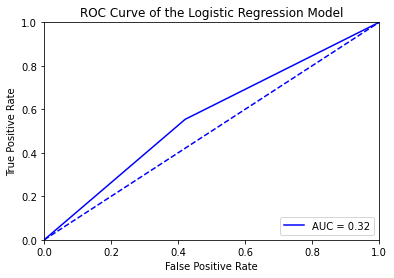

y_pred: Counter({0: 8371, 1: 6942})
y_test: Counter({0: 11595, 1: 3718})
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.58      0.67     11595
           1       0.30      0.55      0.39      3718

    accuracy                           0.57     15313
   macro avg       0.55      0.57      0.53     15313
weighted avg       0.68      0.57      0.60     15313

Confusion Matrix:
 [[6713 4882]
 [1658 2060]]


<Figure size 648x648 with 0 Axes>

<AxesSubplot:>

Text(60.0, 0.5, 'Actual label')

Text(0.5, 103.73999999999997, 'Predicted label')

Text(0.5, 1.0, 'Accuracy Score: 0.5729119049173904')

Gini Coeficient: 0.13


<Figure size 432x288 with 0 Axes>

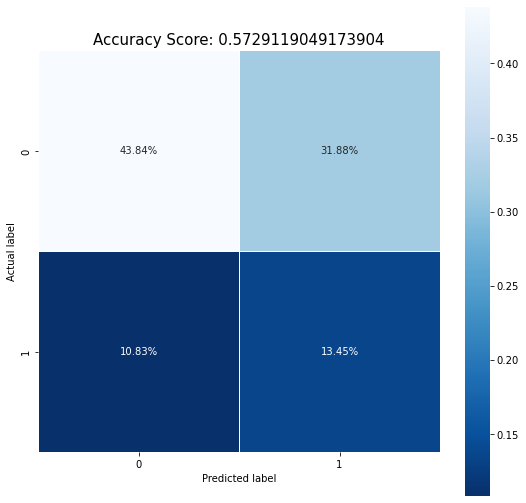

In [28]:
#-------------------------------- Model testing ---------------------------------#
y_pred = lr_mod.predict(x_test)

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

test_score = lr_mod.score(x_test, y_test)
print(f"Score on train: { lr_mod.score(x_train, y_train) }")
print(f"Score on test: { test_score }")

preds = lr_mod.predict(x_test)
print(f"Accuracy score on test: { accuracy_score(y_test, preds) }")

y_score = lr_mod.predict_proba(x_test)[:, 1]
mean_precision = average_precision_score(y_test, y_score)
print(f"Mean precision on test: { mean_precision }")

#Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(f"auc_precision_recall on test: { auc_precision_recall }")

#Plot the precision - recall curve result
fp_rate, tp_rate, threshold = roc_curve(y_test, preds)
plt.title('ROC Curve of the Logistic Regression Model');
plt.plot(fp_rate, tp_rate, color = 'b', label = 'AUC = %0.2f' % auc_precision_recall);
plt.legend(loc = 'lower right');
plt.plot([0, 1], [0, 1],'b--');
plt.xlim([0, 1]);
plt.ylim([0, 1]);
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.clf()

print(f'y_pred: { collections.Counter(preds) }')
print(f'y_test: { collections.Counter(y_test) }')
print(f'Classification Report: \n { classification_report(y_test, preds) }')

cm = confusion_matrix(y_test, preds)
print(f'Confusion Matrix:\n { cm }')
plt.figure(figsize = (9, 9))
sns.heatmap((cm / cm.sum()), annot = True, fmt = ".2%", linewidths = .5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(test_score)
plt.title(all_sample_title, size = 15)

gini_coef = (2 * roc_auc_score(y_test, preds)) - 1
print('Gini Coeficient: %0.2f' % gini_coef)

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [29]:
#-------------------------------- Model training -------------------------------#

rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

Score on train: 1.0
Score on test: 0.6617906354078235
Accuracy_score on test: 0.6617906354078235
mean precision on test: 0.3977542228034646
auc_precision_recall on test: 0.3995909034407933


Text(0.5, 1.0, 'ROC Curve of the Random Forest Model')

(0.0, 1.0)

(0.0, 1.0)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

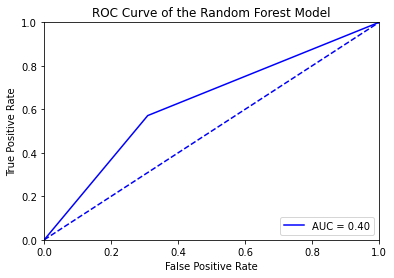

y_pred: Counter({0: 9604, 1: 5709})
y_test: Counter({0: 11595, 1: 3718})
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.69      0.76     11595
           1       0.37      0.57      0.45      3718

    accuracy                           0.66     15313
   macro avg       0.60      0.63      0.60     15313
weighted avg       0.72      0.66      0.68     15313

Confusion Matrix:
 [[8010 3585]
 [1594 2124]]


<Figure size 648x648 with 0 Axes>

<AxesSubplot:>

Text(60.0, 0.5, 'Actual label')

Text(0.5, 103.73999999999997, 'Predicted label')

Text(0.5, 1.0, 'Accuracy Score: 0.6617906354078235')

Gini Coeficient: 0.26


<Figure size 432x288 with 0 Axes>

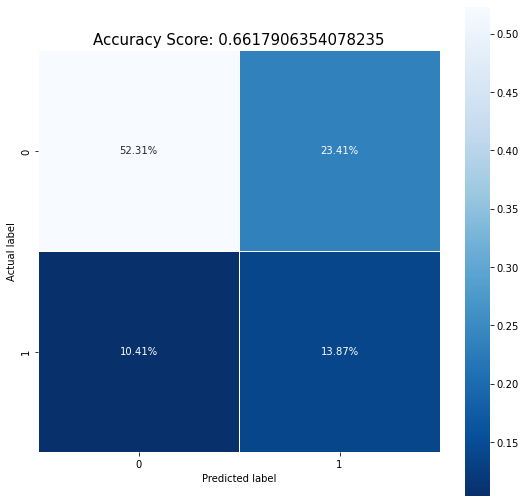

In [30]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model
y_pred = rfc.predict(x_test)

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

test_score = rfc.score(x_test, y_test)
print(f"Score on train: { rfc.score(x_train, y_train) }")
print(f"Score on test: { test_score }")

preds = rfc.predict(x_test)
print(f"Accuracy_score on test: { accuracy_score(y_test, preds) }")

y_score = rfc.predict_proba(x_test)[:, 1]
mean_precision = average_precision_score(y_test, y_score)
print(f"mean precision on test: { mean_precision }")

#Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

#Use AUC function to calculate the area under the curve of precision - recall curve
auc_precision_recall = auc(recall, precision)
print(f"auc_precision_recall on test: { auc_precision_recall }")
fp_rate, tp_rate, threshold = roc_curve(y_test, preds)

#Plot the precision - recall curve
fp_rate, tp_rate, threshold = roc_curve(y_test, preds)
plt.title('ROC Curve of the Random Forest Model');
plt.plot(fp_rate, tp_rate, color = 'b', label = 'AUC = %0.2f' % auc_precision_recall);
plt.legend(loc = 'lower right');
plt.plot([0, 1], [0, 1],'b--');
plt.xlim([0, 1]);
plt.ylim([0, 1]);
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.clf()

print(f'y_pred: { collections.Counter(preds) }')
print(f'y_test: { collections.Counter(y_test) }')
print(f'Classification Report: \n { classification_report(y_test, preds) }')

cm = confusion_matrix(y_test, preds)
print(f'Confusion Matrix:\n { cm }')
plt.figure(figsize = (9, 9))
sns.heatmap((cm / cm.sum()), annot = True, fmt = ".2%", linewidths = .5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(test_score)
plt.title(all_sample_title, size = 15)

gini_coef = (2 * roc_auc_score(y_test, preds)) - 1
print('Gini Coeficient: %0.2f' % gini_coef)

<mark>__Result:__
    
The random forest classifier is slightly better than logistic regression as it consistently scores higher in Accuracy, AUC, Precision, Recall, F1-score and the Gini coefficient.

<b>Logistic Regression Model:</b>

- Accuracy: 0.57
- AUC: 0.32
- Macro Precision Average: 0.55
- Macro Recall Average: 0.57
- Macro F1-score: 0.53
- Gini  0.13

<b>Random Forest Model:</b>

- Accuracy  0.66
- AUC    0.40
- Macro Precision Average: 0.60
- Macro Recall Average: 0.63
- Macro F1-score: 0.60
- Gini  0.26

### Q4.3 Identify most important features impacting churn

In [31]:
#Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

top20_ft = pd.Series(rfc.feature_importances_, index = x_train.columns)
top20_ft = top20_ft.sort_values(ascending = False)
top20_ft = top20_ft.iloc[:20]

top20_ft

CurrentEquipmentDays      0.044768
PercChangeMinutes         0.040440
ServiceArea               0.035840
MonthlyRevenue            0.035597
MonthlyMinutes            0.035059
perc_recurrent_charge     0.033701
MonthsInService           0.032276
PeakCallsInOut            0.030184
PercChangeRevenues        0.029019
ReceivedCalls             0.028530
perc_PeakCallsInOut       0.028390
OffPeakCallsInOut         0.028374
UnansweredCalls           0.027063
perc_OffPeakCallsInOut    0.026373
OutboundCalls             0.025975
AgeHH1                    0.025296
TotalRecurringCharge      0.024081
DroppedBlockedCalls       0.023673
perc_UnansweredCalls      0.022554
perc_OutboundCalls        0.021107
dtype: float64

## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [32]:
#Type your code here to predict churners based on the hold out data set provided

holdout_df = pd.read_csv(r'{}'.format(hold_out_f_name))

#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

holdout_df, inspection_cols = enc_cols(holdout_df)

holdout_df.drop('Churn', axis = 1, inplace = True)

trans_holdout_df, is_float_col, is_int_col = process_data(holdout_df, inspection_cols)

#Determine missing cols
missing_cols = [col for col in x_train.columns if col not in trans_holdout_df.columns]

missing_cols

#Create missing columns
for col in missing_cols:

    trans_holdout_df[col] = np.zeros(len(trans_holdout_df))

#Define function to scale hold out data
def transform_holdout(df, to_scale_cols, no_scale_cols, scaler):

    to_scale_cols = df[to_scale_cols]
    no_scale_cols = df[no_scale_cols]

    scaled_cols = pd.DataFrame(scaler.transform(to_scale_cols), index = to_scale_cols.index, columns = to_scale_cols.columns)
    df = pd.concat([scaled_cols, no_scale_cols], axis = 1)

    return df

#Scale holdout data
trans_holdout_df = transform_holdout(trans_holdout_df, scaling_cols, no_scaling_cols, df_scaler)

#Use "predict" function on the transformed data using the best fitted model object
y_pred = rfc.predict(trans_holdout_df)
y_pred_probs = rfc.predict_proba(trans_holdout_df)[0:10]

no_churn_prob = y_pred_probs[ : , 0]
churn_prob = y_pred_probs[ : , 1]

y_res = pd.DataFrame([no_churn_prob, churn_prob], index = ['Probability of no churn', 'Probability of churn'])
y_res

['is_unknown_Handsets',
 'is_unknown_HandsetModels',
 'is_unknown_CurrentEquipmentDays']

,0,1,2,3,4,5,6,7,8,9
Probability of no churn,0.55,0.54,0.575,0.595,0.64,0.52,0.475,0.475,0.495,0.58
Probability of churn,0.45,0.46,0.425,0.405,0.36,0.48,0.525,0.525,0.505,0.42


## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

,y,predicted_probability,predicted,CustomerID
35728,0,0.555,1,3285290
35729,0,0.535,1,3285298
35730,1,0.625,1,3285302
35731,0,0.540,1,3285310
35732,0,0.305,0,3285314


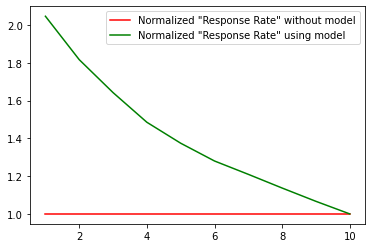

<Figure size 432x288 with 0 Axes>

In [33]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)

def gen_lift_df(df, true_col, pred_col, probs_col):

    df = df.copy()

    df.sort_values(by = probs_col, ascending = False, inplace = True)
    subset = df
    rows = []

    #Split by decile
    for group in np.array_split(subset, 10):

        score = sum(group[true_col].tolist())

        rows.append({'n_cases': len(group), 'n_correct_preds': score})

    lift = pd.DataFrame(rows)

    #Calculate the cumulative gains
    lift['running_correct'] = lift['n_correct_preds'].cumsum()
    lift['correct_pct'] = lift.apply(lambda x: ((x['running_correct'] * 100) / lift['n_correct_preds'].sum()), axis = 1)
    lift['cum_correct_best_case'] = lift['n_cases'].cumsum()
    lift['pct_correct_best_case'] = lift['cum_correct_best_case'].apply(lambda x: 100 if ((100 * x) / lift['n_correct_preds'].sum()) > 100 else ((100  * x) / lift['n_correct_preds'].sum()))
    lift['avg_case'] = lift['n_correct_preds'].sum() / len(lift)
    lift['cum_avg_case'] = lift['avg_case'].cumsum()
    lift['pct_avg_case'] = lift['cum_avg_case'].apply(lambda x: ((100 * x) / lift['n_correct_preds'].sum()))

    #Calculate the lift score and normal Lift Chart
    lift['norm_percent_avg'] = 1
    lift['lift_score'] = lift['correct_pct'] / lift['pct_avg_case']

    lift.drop(['cum_correct_best_case', 'avg_case', 'pct_avg_case', 'pct_correct_best_case', 'cum_avg_case'], axis = 1,
              inplace = True)

    return lift

cust_df.columns 

d = {'y': y_test, 'predicted_probability': rfc.predict_proba(x_test)[:,1] ,'predicted': preds,
     "CustomerID": cust_df[cust_df.index.isin(test_data_idx)].CustomerID}
df_cust = pd.DataFrame(data = d)
df_cust.head()

lift = gen_lift_df(df_cust, 'y', 'predicted', 'predicted_probability')

def plot_lift_chart(lift):

    plt.figure()
    plt.plot([i for i in range(1,11)], lift['norm_percent_avg'], 'r-', label = 'Normalized \"Response Rate\" without model')
    plt.plot([i for i in range(1,11)], lift['lift_score'],'g-', label = 'Normalized \"Response Rate\" using model')
    plt.legend()
    plt.show()
    plt.clf()

plot_lift_chart(lift)

<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?
   